<a href="https://colab.research.google.com/github/chodhitha03/2024-STATML_assignments/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
from sklearn.utils import shuffle
from sklearn.utils import resample

# Load and Preprocess the Train Dataset

In [ ]:
column_names = pd.read_csv('/content/online_shoppers_intention.csv', nrows=1).columns.tolist()
data = pd.read_csv('/content/online_shoppers_intention.csv', skiprows=1, header=None)
data.columns = column_names

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## Analyzing Data using Various methods

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Identifying and Handling Missing Data

In [ ]:
if data.isnull().values.any():
    print("\nMissing values found. Filling with column means...")
    data = data.fillna(data.mean())
else:
    print(data.isna().sum())
    print("\nNo missing values found.")

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

No missing values found.


## column-wise analysis

In [ ]:
j=0
for i in data.columns:
  j+=1
  print(f"{j}. {i}\n\n{data[i].describe()}")
  print("-"*50)

1. Administrative

count    12330.000000
mean         2.315166
std          3.321784
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64
--------------------------------------------------
2. Administrative_Duration

count    12330.000000
mean        80.818611
std        176.779107
min          0.000000
25%          0.000000
50%          7.500000
75%         93.256250
max       3398.750000
Name: Administrative_Duration, dtype: float64
--------------------------------------------------
3. Informational

count    12330.000000
mean         0.503569
std          1.270156
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: Informational, dtype: float64
--------------------------------------------------
4. Informational_Duration

count    12330.000000
mean        34.472398
std        140.749294
min          0.000000
25%          0.00000

In [ ]:
j=0
for i in data.columns:
    j+=1
    print(f"{j}. {i}\n")
    print(f"the set of value in \"{i}\" are {sorted(set(data[i]))}")
    print(f"range({i}): {data[i].min()} - {data[i].max()}\n")
    print(f"the length of set of unique value in {i} is {len(set(data[i]))}\n")
    print("frequency:\n")
    print(data[i].value_counts(),"\n")
    print("data discription\n",data[i].describe(),"\n","-"*100)


1. Administrative

the set of value in "Administrative" are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27]
range(Administrative): 0 - 27

the length of set of unique value in Administrative is 27

frequency:

Administrative
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: count, dtype: int64 

data discription
 count    12330.000000
mean         2.315166
std          3.321784
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64 
 ----------------------------------------------------------------------------------------------------
2. Administrative_Duration

the set of value in "Administrative_D

## encoding categorical data

In [ ]:
label_encoder = LabelEncoder()
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = label_encoder.fit_transform(data[i])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8631, 17)
(3700, 17)
(8631,)
(3700,)


# Feature

In [ ]:
y = data['Revenue']
x = data.drop('Revenue', axis=1)

## target variable (y)

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 12330 entries, 0 to 12329
Series name: Revenue
Non-Null Count  Dtype
--------------  -----
12330 non-null  bool 
dtypes: bool(1)
memory usage: 12.2 KB


### Statistical Distribution

In [ ]:
y.describe()

,Revenue
count,12330
unique,2
top,False
freq,10422


In [ ]:
y.value_counts()

,count
Revenue,
False,10422
True,1908


### Kernel Density Estimation (KDE) plot

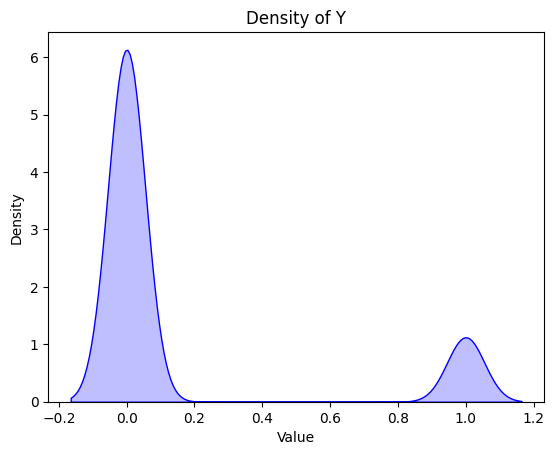

In [ ]:
sns.kdeplot(y, fill=True, color='blue')
plt.title('Density of Y')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

### Frequency distribution of categorical

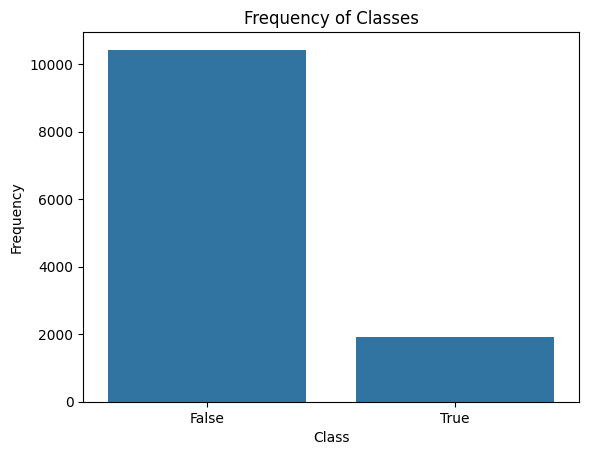

In [ ]:
sns.countplot(x=y)
plt.title('Frequency of Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

##  features (x)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
x.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
for i in x.columns:
    print(x[i].describe())
    print("----------------------------------------")

count    12330.000000
mean         2.315166
std          3.321784
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64
----------------------------------------
count    12330.000000
mean        80.818611
std        176.779107
min          0.000000
25%          0.000000
50%          7.500000
75%         93.256250
max       3398.750000
Name: Administrative_Duration, dtype: float64
----------------------------------------
count    12330.000000
mean         0.503569
std          1.270156
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: Informational, dtype: float64
----------------------------------------
count    12330.000000
mean        34.472398
std        140.749294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64
---------

In [ ]:
for i in x.columns:
    print(f"the set of value in \"{i}\" are {sorted(set(x[i]))}")
    print(f"range({i}): {x[i].min()} - {x[i].max()}\n")
    print(f"the length of set of {i} is {len(set(x[i]))}\nso we have {len(set(x[i]))} types of data values for {i}\n")
    print("frequency:")
    print(x[i].value_counts())
    print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

the set of value in "Administrative" are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27]
range(Administrative): 0 - 27

the length of set of Administrative is 27
so we have 27 types of data values for Administrative

frequency:
Administrative
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
the set of value in "Administrative_Duration" are [0.0, 1.333333333, 2.0, 3.0, 3.5, 4.0, 4.333333333, 4.5, 4.75,

### Exploratory Data Analysis (EDA)

1. Administrative
count    12330.000000
mean         2.315166
std          3.321784
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64

Value Counts:
 Administrative
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: count, dtype: int64


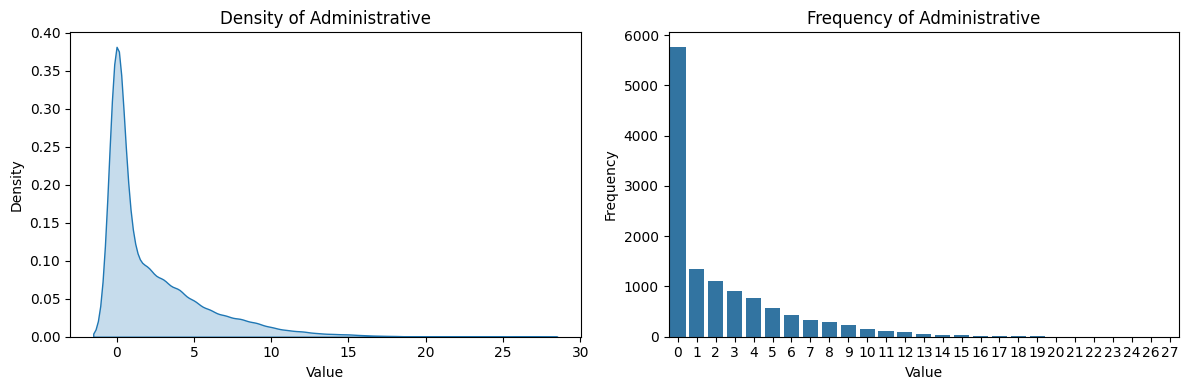



2. Administrative_Duration
count    12330.000000
mean        80.818611
std        176.779107
min          0.000000
25%          0.000000
50%          7.500000
75%         93.256250
max       3398.750000
Name: Administrative_Duration, dtype: float64

Value Counts:
 Administrative_Duration
0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: count, Length: 3335, dtype: int64


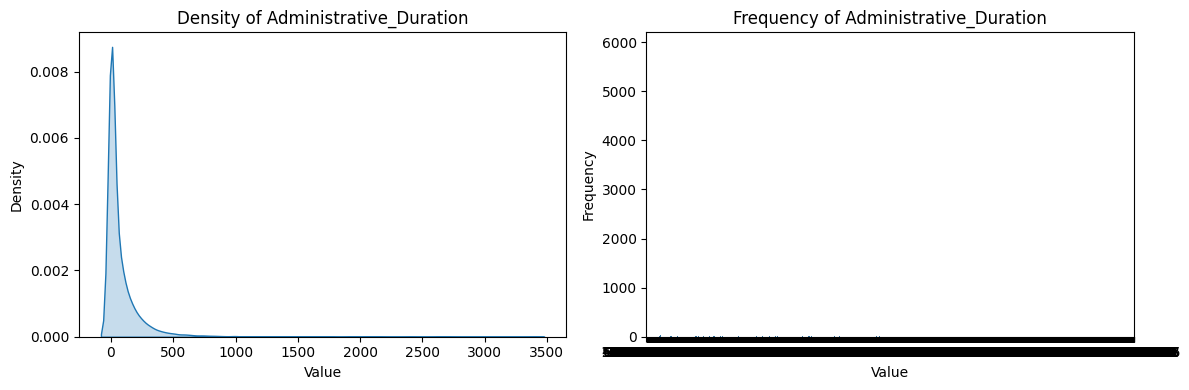



3. Informational
count    12330.000000
mean         0.503569
std          1.270156
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: Informational, dtype: float64

Value Counts:
 Informational
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: count, dtype: int64


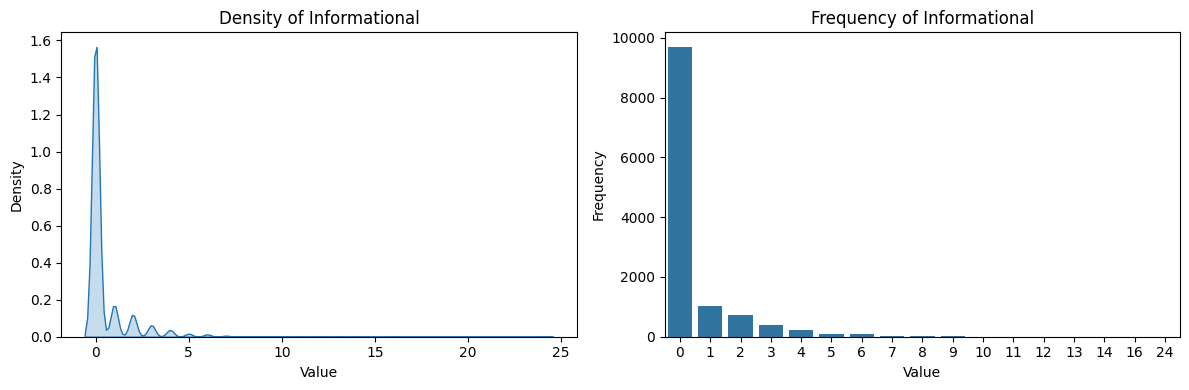



4. Informational_Duration
count    12330.000000
mean        34.472398
std        140.749294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64

Value Counts:
 Informational_Duration
0.00      9925
9.00        33
7.00        26
10.00       26
6.00        26
          ... 
246.80       1
274.00       1
13.40        1
223.15       1
211.25       1
Name: count, Length: 1258, dtype: int64


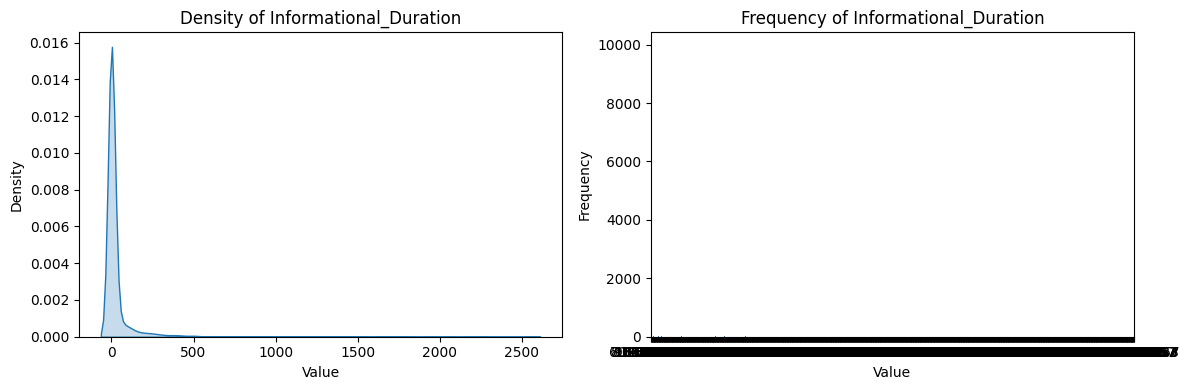



5. ProductRelated
count    12330.000000
mean        31.731468
std         44.475503
min          0.000000
25%          7.000000
50%         18.000000
75%         38.000000
max        705.000000
Name: ProductRelated, dtype: float64

Value Counts:
 ProductRelated
1      622
2      465
3      458
4      404
6      396
      ... 
243      1
409      1
262      1
414      1
192      1
Name: count, Length: 311, dtype: int64


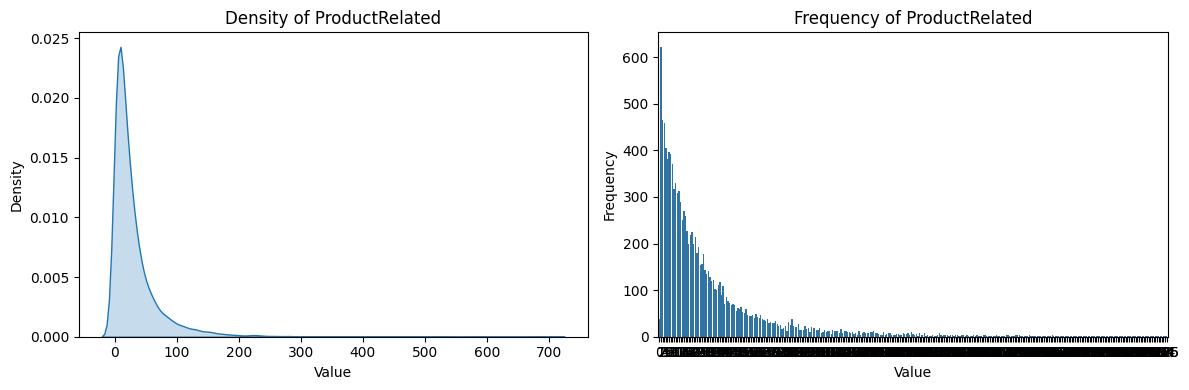



6. ProductRelated_Duration
count    12330.000000
mean      1194.746220
std       1913.669288
min          0.000000
25%        184.137500
50%        598.936905
75%       1464.157214
max      63973.522230
Name: ProductRelated_Duration, dtype: float64

Value Counts:
 ProductRelated_Duration
0.000000      755
17.000000      21
11.000000      17
8.000000       17
15.000000      16
             ... 
964.070513      1
593.507143      1
831.388889      1
922.208333      1
346.000000      1
Name: count, Length: 9551, dtype: int64


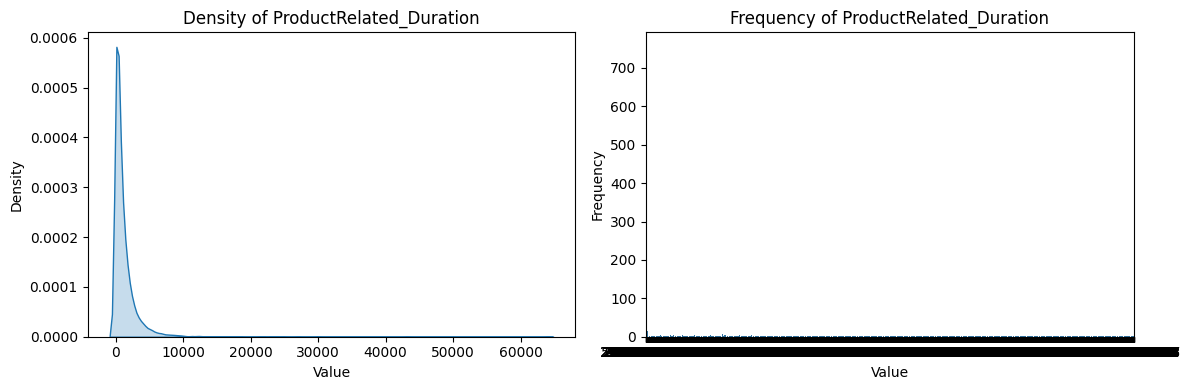



7. BounceRates
count    12330.000000
mean         0.022191
std          0.048488
min          0.000000
25%          0.000000
50%          0.003112
75%          0.016813
max          0.200000
Name: BounceRates, dtype: float64

Value Counts:
 BounceRates
0.000000    5518
0.200000     700
0.066667     134
0.028571     115
0.050000     113
            ... 
0.079279       1
0.006723       1
0.013527       1
0.074419       1
0.011149       1
Name: count, Length: 1872, dtype: int64


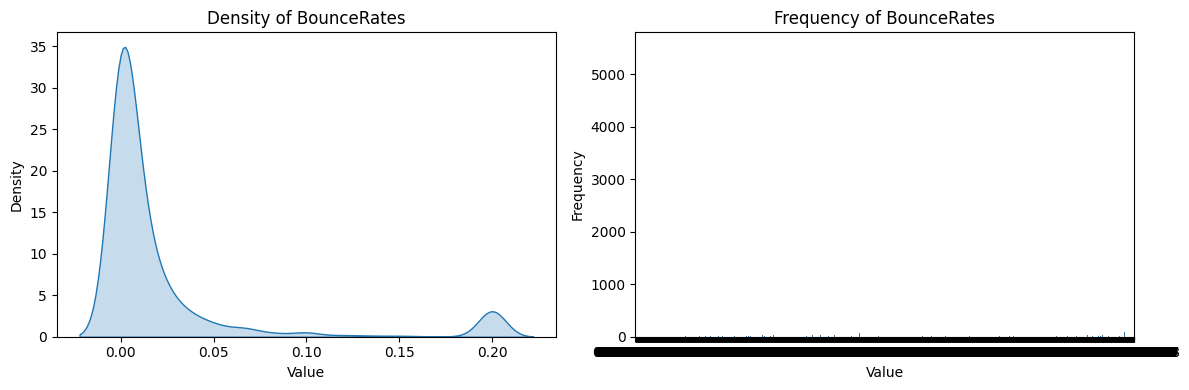



8. ExitRates
count    12330.000000
mean         0.043073
std          0.048597
min          0.000000
25%          0.014286
50%          0.025156
75%          0.050000
max          0.200000
Name: ExitRates, dtype: float64

Value Counts:
 ExitRates
0.200000    710
0.100000    338
0.050000    329
0.033333    291
0.066667    267
           ... 
0.021816      1
0.015787      1
0.010302      1
0.014534      1
0.029031      1
Name: count, Length: 4777, dtype: int64


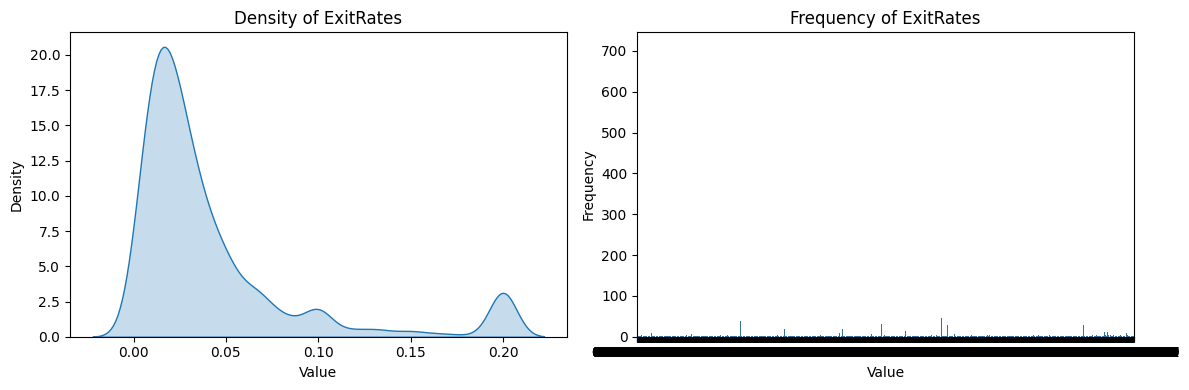



9. PageValues
count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

Value Counts:
 PageValues
0.000000     9600
53.988000       6
42.293068       3
59.988000       2
16.158558       2
             ... 
6.673696        1
6.094324        1
28.253955       1
16.090650       1
12.241717       1
Name: count, Length: 2704, dtype: int64


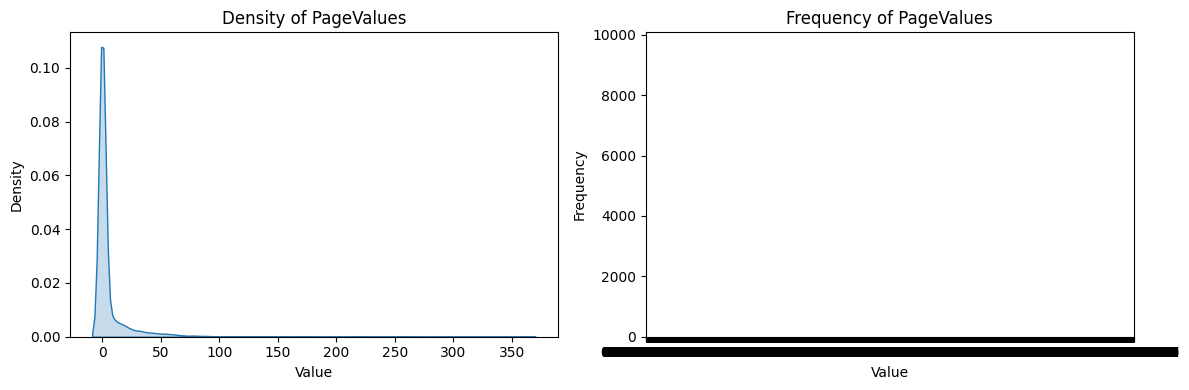



10. SpecialDay
count    12330.000000
mean         0.061427
std          0.198917
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SpecialDay, dtype: float64

Value Counts:
 SpecialDay
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: count, dtype: int64


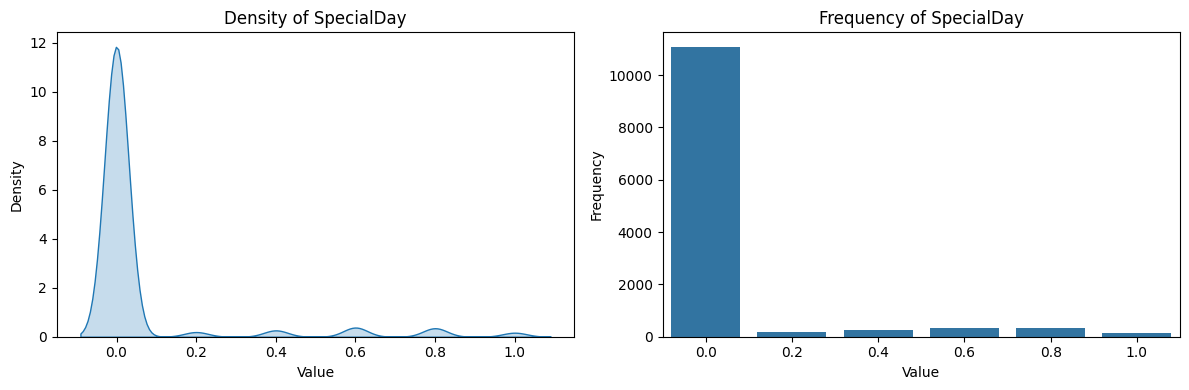



11. OperatingSystems
count    12330.000000
mean         2.124006
std          0.911325
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: OperatingSystems, dtype: float64

Value Counts:
 OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64


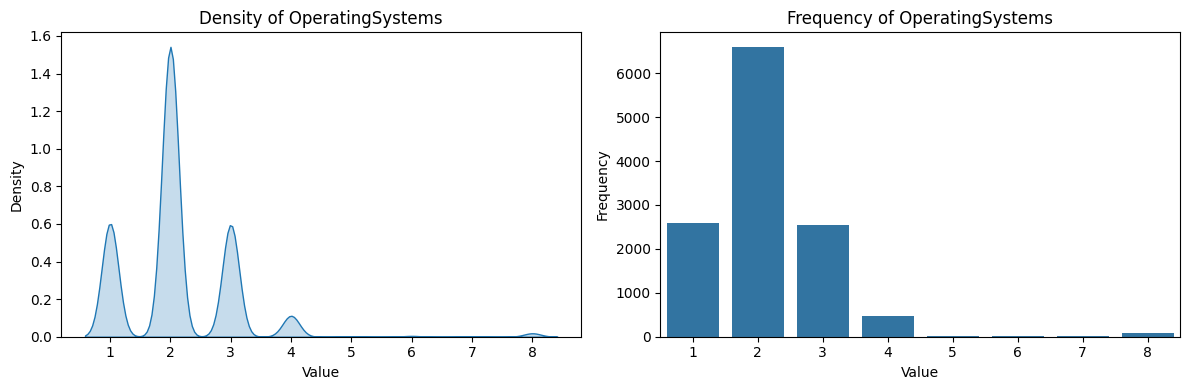



12. Browser
count    12330.000000
mean         2.357097
std          1.717277
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         13.000000
Name: Browser, dtype: float64

Value Counts:
 Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64


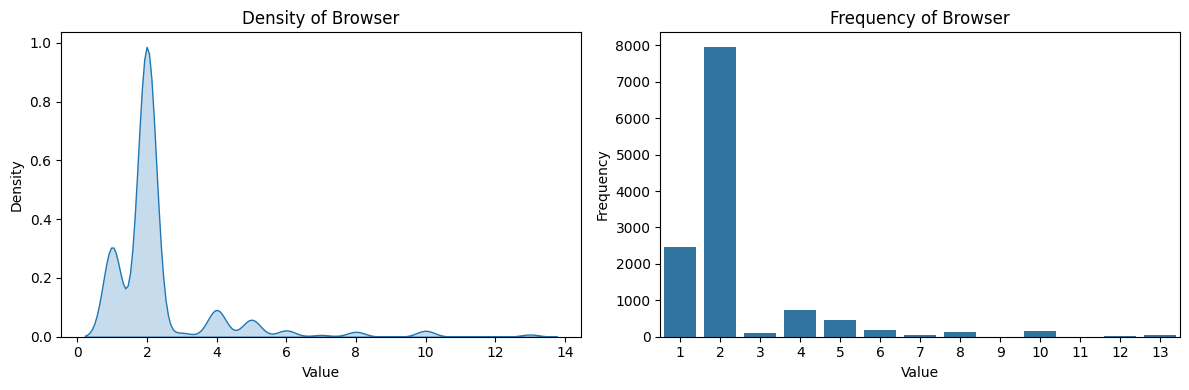



13. Region
count    12330.000000
mean         3.147364
std          2.401591
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: Region, dtype: float64

Value Counts:
 Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64


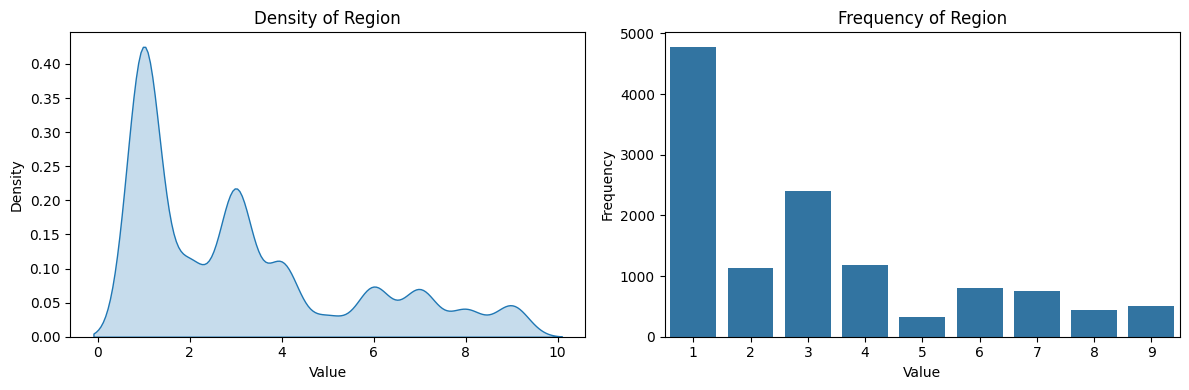



14. TrafficType
count    12330.000000
mean         4.069586
std          4.025169
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         20.000000
Name: TrafficType, dtype: float64

Value Counts:
 TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int64


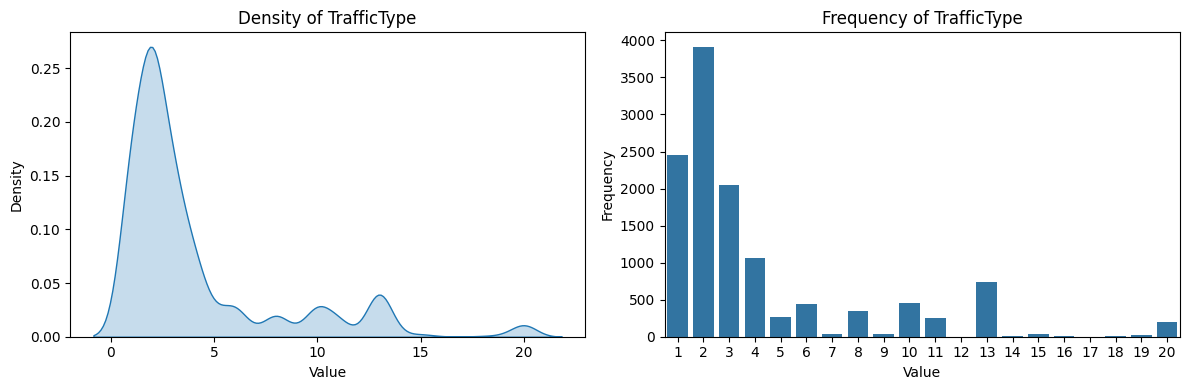



15. Weekend
count     12330
unique        2
top       False
freq       9462
Name: Weekend, dtype: object

Value Counts:
 Weekend
False    9462
True     2868
Name: count, dtype: int64


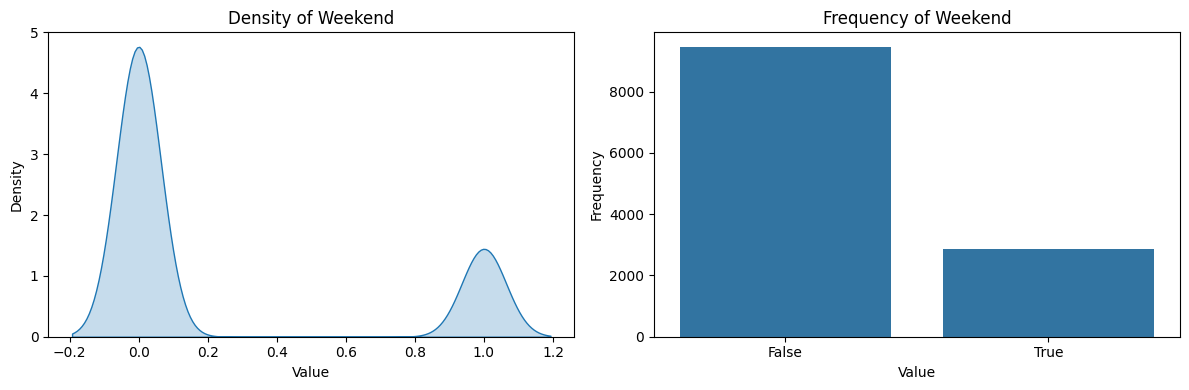



16. Month_Aug
count    12330.000000
mean         0.035118
std          0.184084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Month_Aug, dtype: float64

Value Counts:
 Month_Aug
0.0    11897
1.0      433
Name: count, dtype: int64


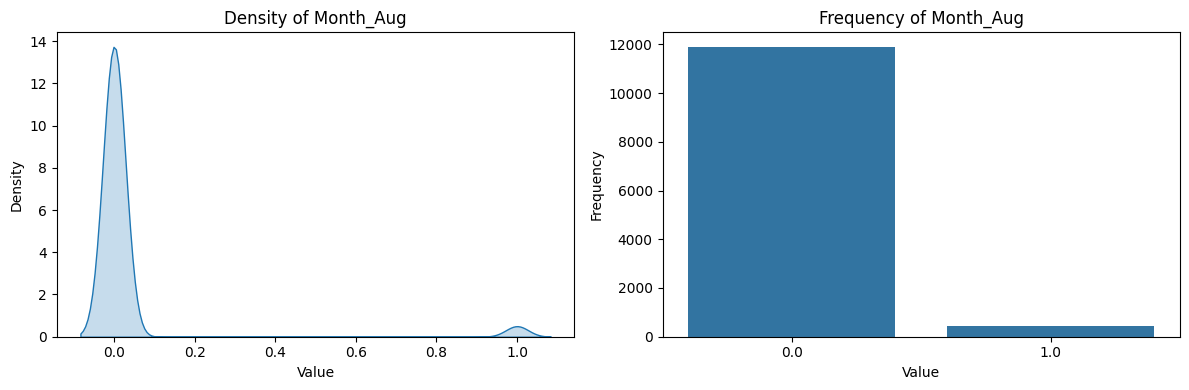



17. Month_Dec
count    12330.000000
mean         0.140065
std          0.347068
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Month_Dec, dtype: float64

Value Counts:
 Month_Dec
0.0    10603
1.0     1727
Name: count, dtype: int64


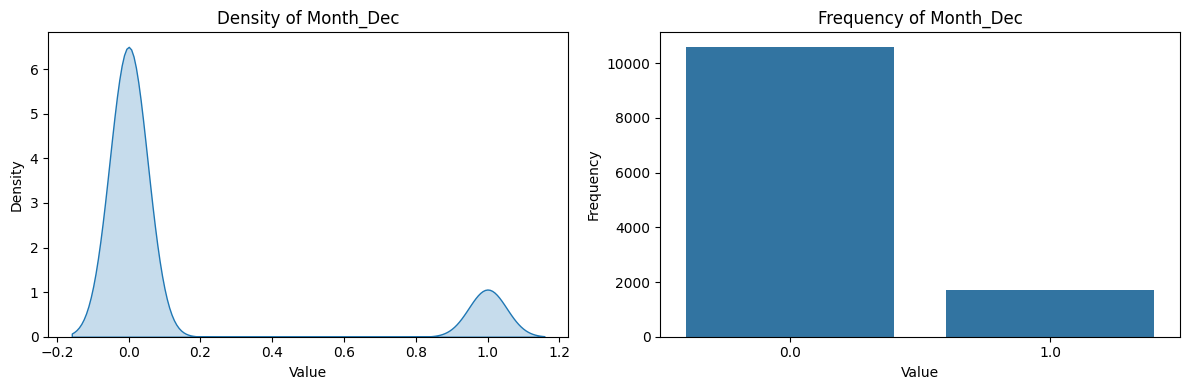



18. Month_Feb
count    12330.000000
mean         0.014923
std          0.121250
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Month_Feb, dtype: float64

Value Counts:
 Month_Feb
0.0    12146
1.0      184
Name: count, dtype: int64


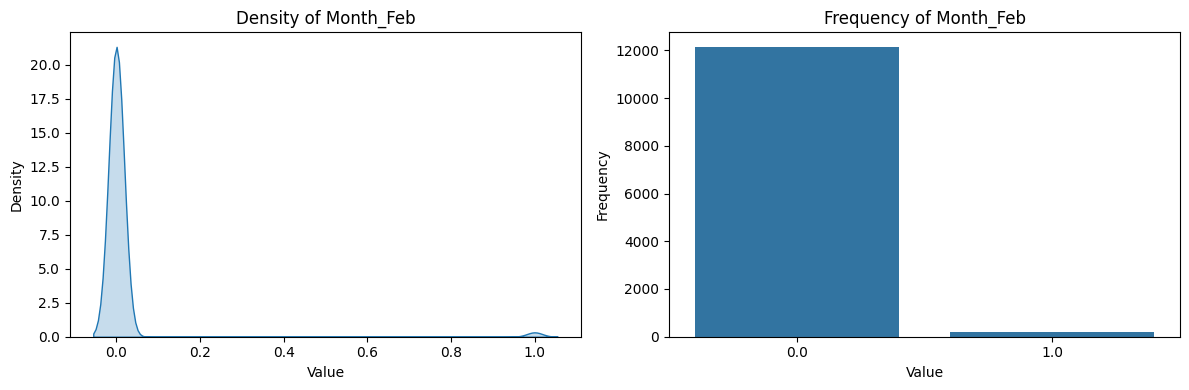



19. Month_Jul
count    12330.000000
mean         0.035036
std          0.183880
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Month_Jul, dtype: float64

Value Counts:
 Month_Jul
0.0    11898
1.0      432
Name: count, dtype: int64


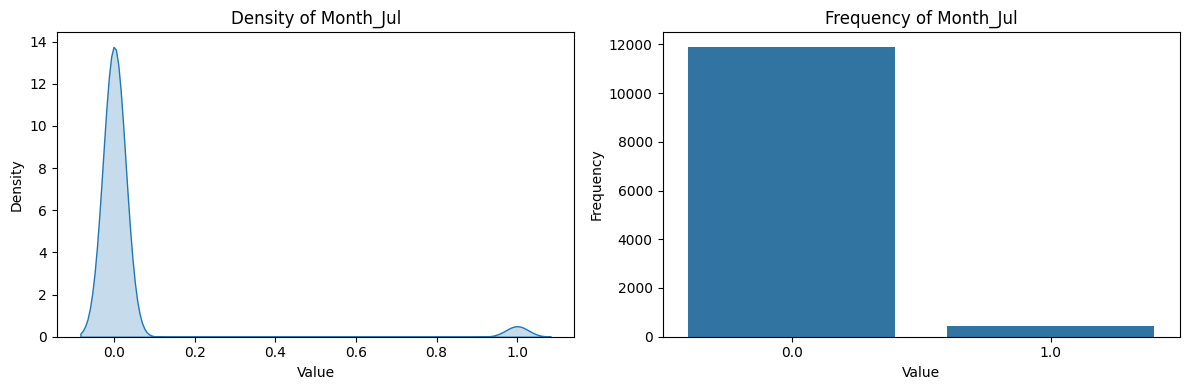



20. Month_June
count    12330.000000
mean         0.023358
std          0.151043
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Month_June, dtype: float64

Value Counts:
 Month_June
0.0    12042
1.0      288
Name: count, dtype: int64


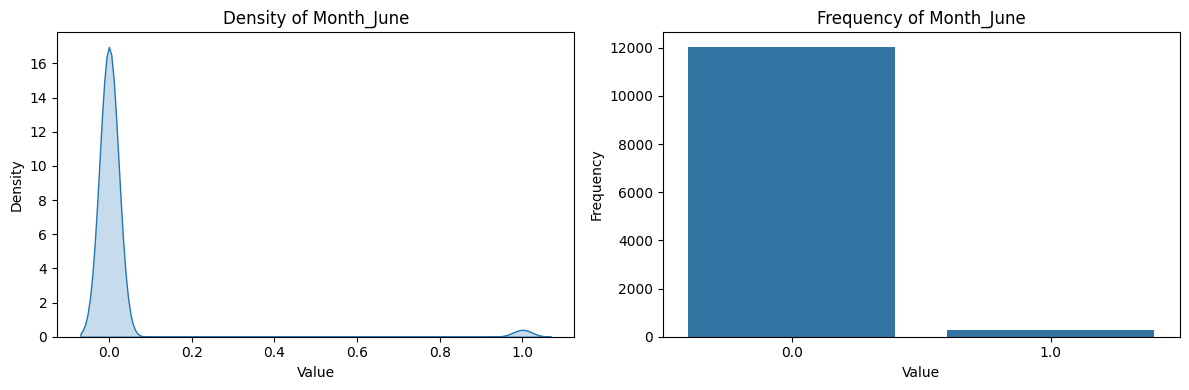



21. Month_Mar
count    12330.000000
mean         0.154663
std          0.361598
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Month_Mar, dtype: float64

Value Counts:
 Month_Mar
0.0    10423
1.0     1907
Name: count, dtype: int64


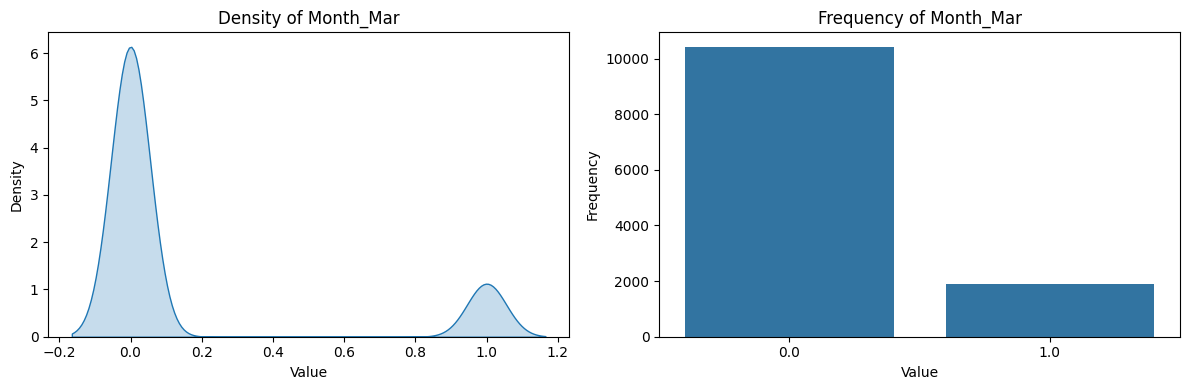



22. Month_May
count    12330.000000
mean         0.272830
std          0.445432
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Month_May, dtype: float64

Value Counts:
 Month_May
0.0    8966
1.0    3364
Name: count, dtype: int64


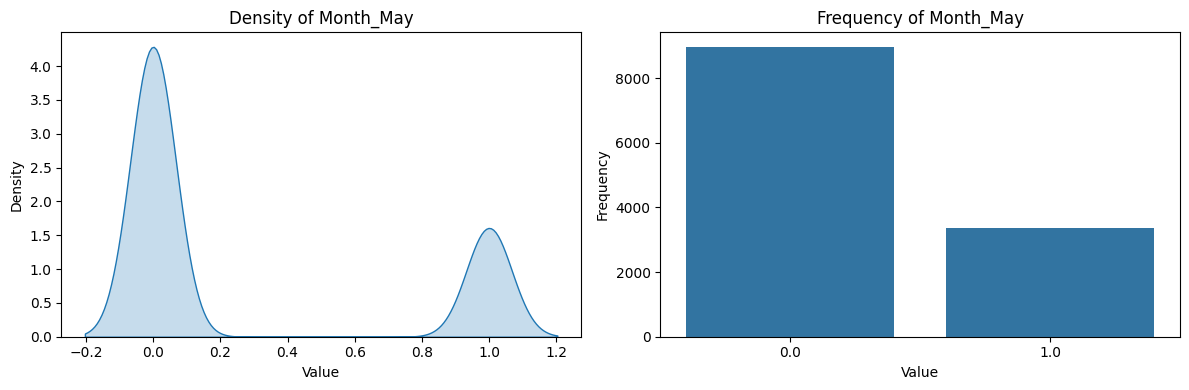



23. Month_Nov
count    12330.000000
mean         0.243147
std          0.429000
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Month_Nov, dtype: float64

Value Counts:
 Month_Nov
0.0    9332
1.0    2998
Name: count, dtype: int64


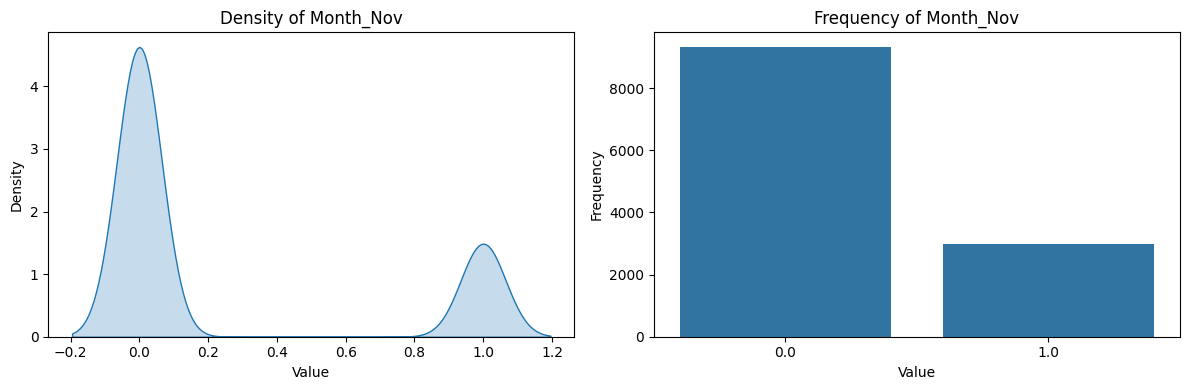



24. Month_Oct
count    12330.000000
mean         0.044526
std          0.206268
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Month_Oct, dtype: float64

Value Counts:
 Month_Oct
0.0    11781
1.0      549
Name: count, dtype: int64


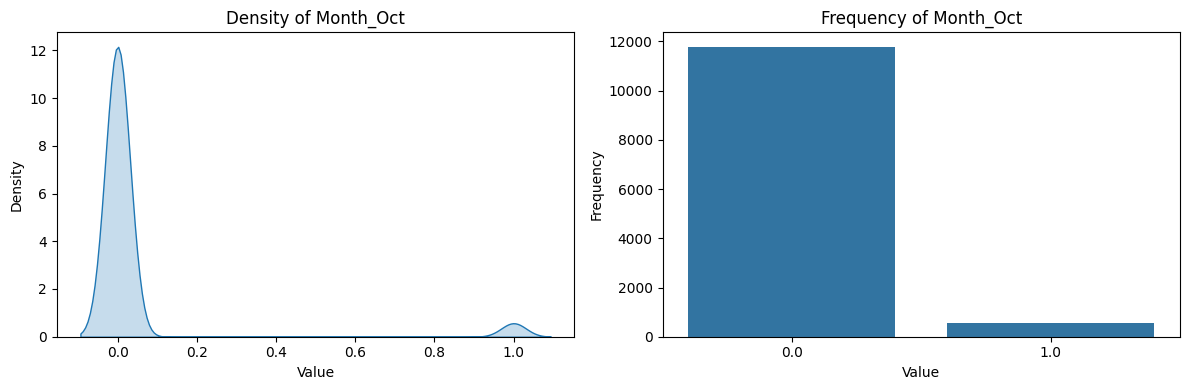



25. Month_Sep
count    12330.000000
mean         0.036334
std          0.187128
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Month_Sep, dtype: float64

Value Counts:
 Month_Sep
0.0    11882
1.0      448
Name: count, dtype: int64


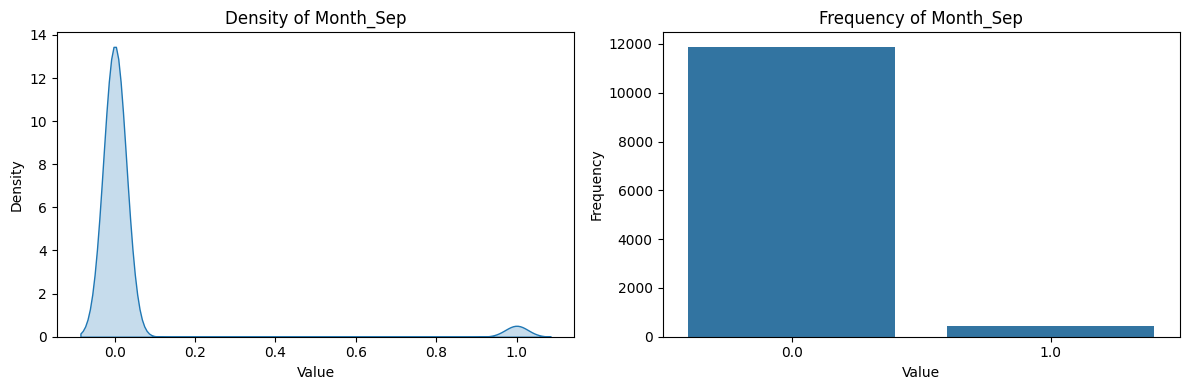



26. VisitorType_New_Visitor
count    12330.000000
mean         0.137388
std          0.344271
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: VisitorType_New_Visitor, dtype: float64

Value Counts:
 VisitorType_New_Visitor
0.0    10636
1.0     1694
Name: count, dtype: int64


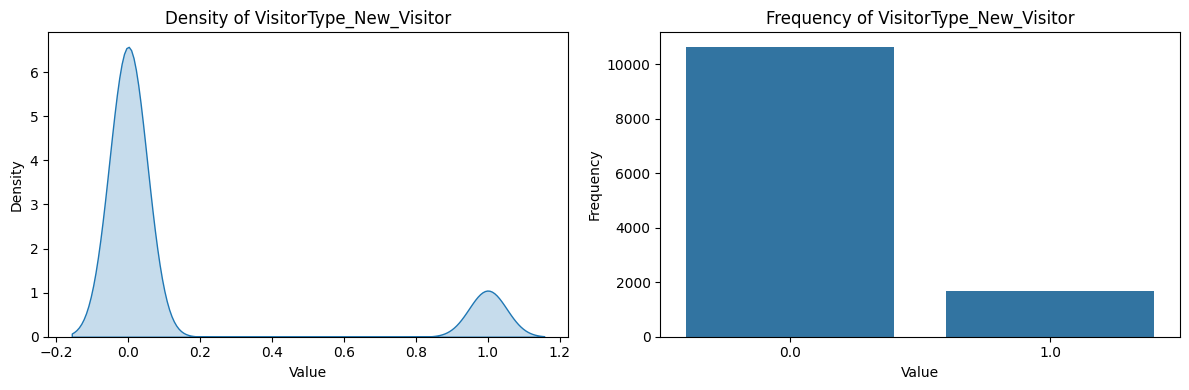



27. VisitorType_Other
count    12330.000000
mean         0.006894
std          0.082745
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: VisitorType_Other, dtype: float64

Value Counts:
 VisitorType_Other
0.0    12245
1.0       85
Name: count, dtype: int64


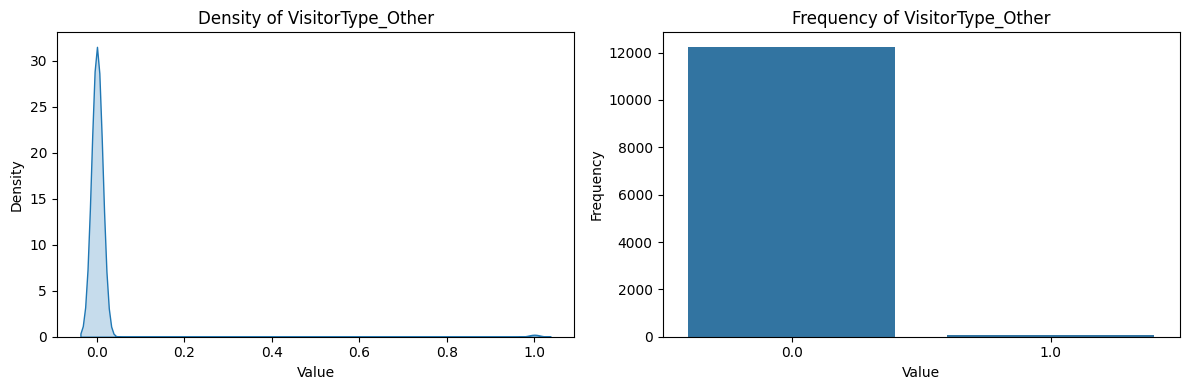



28. VisitorType_Returning_Visitor
count    12330.000000
mean         0.855718
std          0.351390
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: VisitorType_Returning_Visitor, dtype: float64

Value Counts:
 VisitorType_Returning_Visitor
1.0    10551
0.0     1779
Name: count, dtype: int64


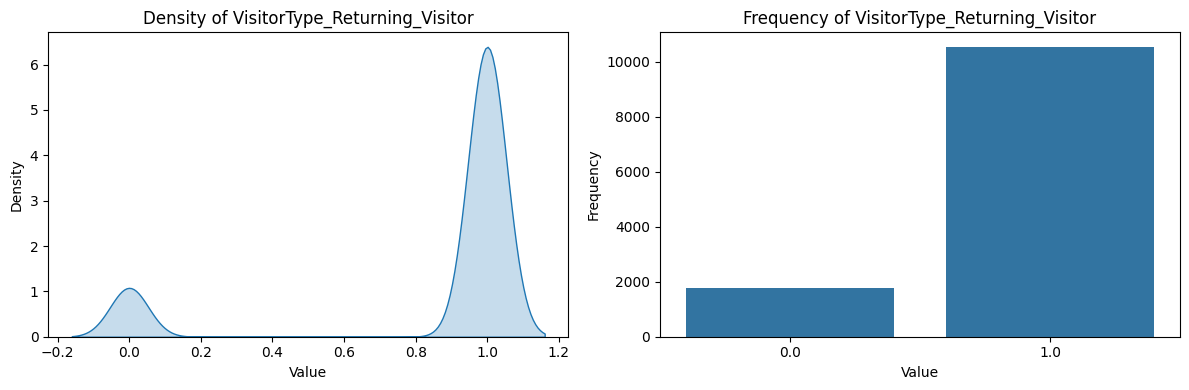

In [ ]:
for j, i in enumerate(x.columns, 1):
    print(f"{j}. {i}\n{'=' * 50}")
    print(x[i].describe())
    print("\nValue Counts:\n", x[i].value_counts())

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create a 1x2 grid

    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(x[i]):
        # Density Plot for numeric data
        sns.kdeplot(x[i], fill=True, ax=axes[0])
        axes[0].set_title(f'Density of {i}')
        axes[0].set_xlabel('Value')
        axes[0].set_ylabel('Density')
    else:
        # Handle categorical data (e.g., using a bar plot)
        axes[0].set_title(f'Distribution of {i}')  # Update title
        x[i].value_counts().plot(kind='bar', ax=axes[0])
        axes[0].set_xlabel('Category')  # Update x-axis label
        axes[0].set_ylabel('Frequency')  # Update y-axis label


    # Frequency Plot (Countplot)
    sns.countplot(x=x[i], ax=axes[1])
    axes[1].set_title(f'Frequency of {i}')
    axes[1].set_xlabel('Value')
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

    print("\n" + "=" * 127 + "\n")

### Kernel Density Estimation (KDE) Plots

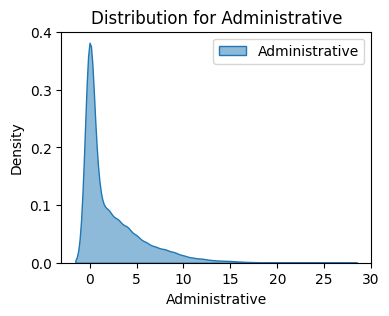

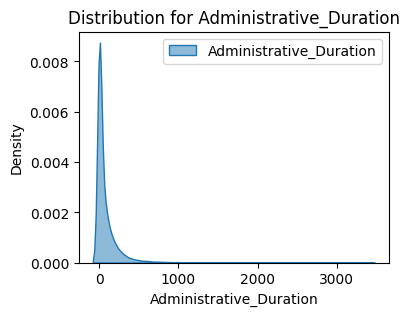

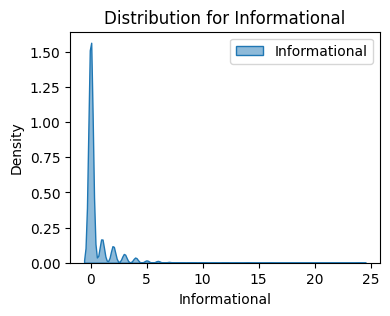

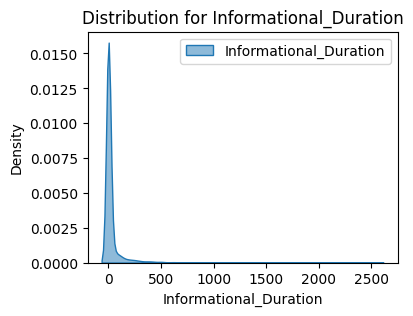

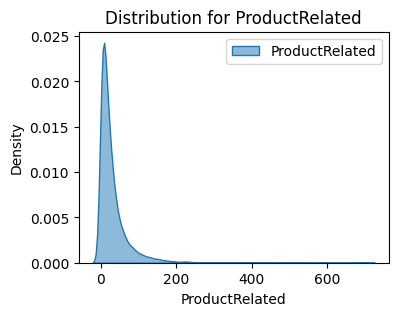

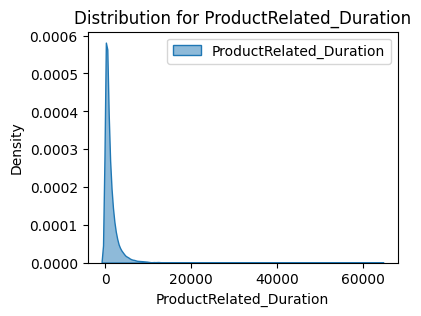

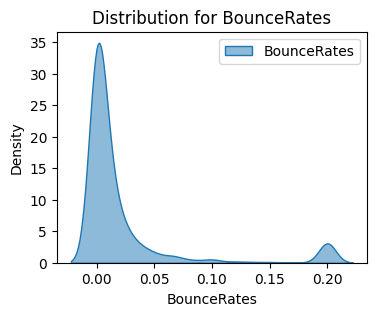

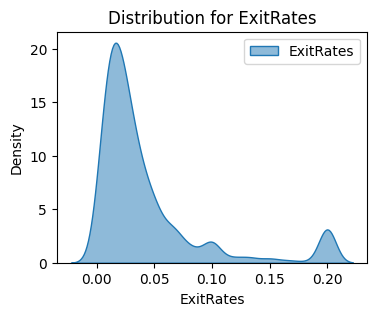

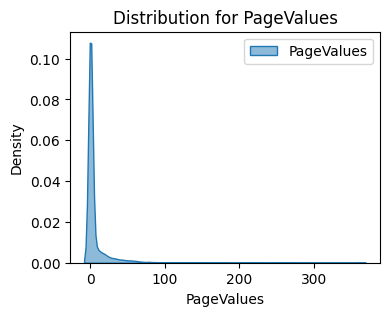

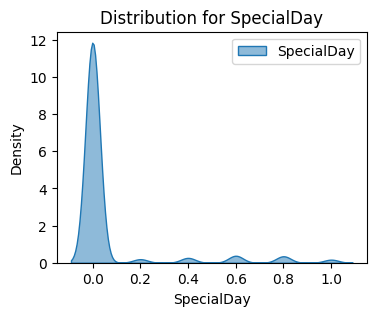

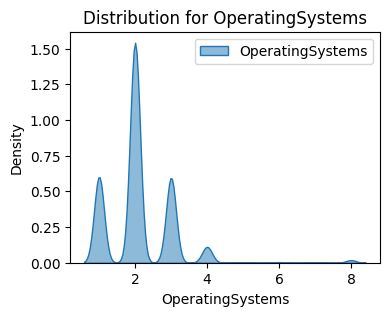

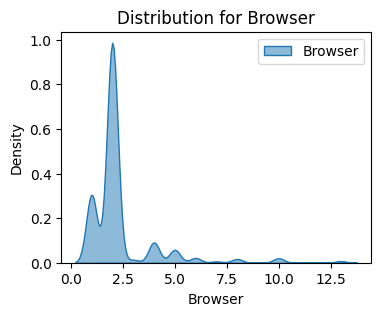

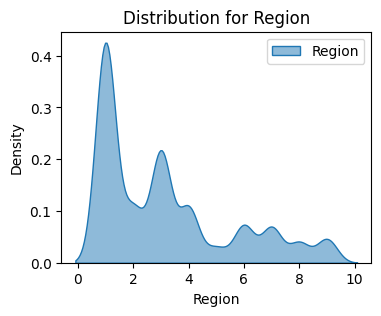

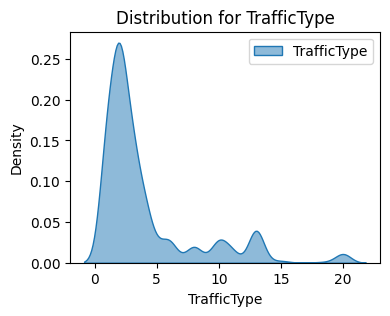

In [ ]:
numeric_columns = x.select_dtypes(include=['number']).columns
for col in numeric_columns: # Changed from x.columns to numeric_columns
    plt.figure(figsize=(4, 3))
    sns.kdeplot(x[col], label=col, fill=True, alpha=0.5)
    plt.title(f'Distribution for {col}')
    plt.legend()
    plt.show()

# Splitting the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training Features shape (X_train):",X_train.shape)
print("\nTraining Labels shape (y_train):",y_train.shape)
print("\nTesting Features shape (X_test):",X_test.shape)
print("\nTesting Labels shape (y_test):",y_test.shape)

Training Features shape (X_train): (9864, 17)

Training Labels shape (y_train): (9864,)

Testing Features shape (X_test): (2466, 17)

Testing Labels shape (y_test): (2466,)


# Training Models

## Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)

In [ ]:
print(f"Accuracy (Perceptron): { accuracy_score(y_test, y_pred_perceptron)}")

Accuracy (Perceptron): 0.8811841038118411


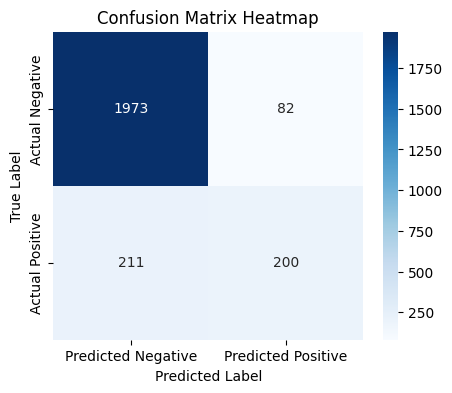

In [ ]:
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_perceptron, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_perceptron))

              precision    recall  f1-score   support

       False       0.90      0.96      0.93      2055
        True       0.71      0.49      0.58       411

    accuracy                           0.88      2466
   macro avg       0.81      0.72      0.75      2466
weighted avg       0.87      0.88      0.87      2466



## LogisticRegression

In [ ]:
LR = LogisticRegression()
model = LR.fit(X_train, y_train)
log_y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(f"Accuracy (Logistic Regression): {accuracy_score(y_test, log_y_pred)}")

Accuracy (Logistic Regression): 0.8686131386861314


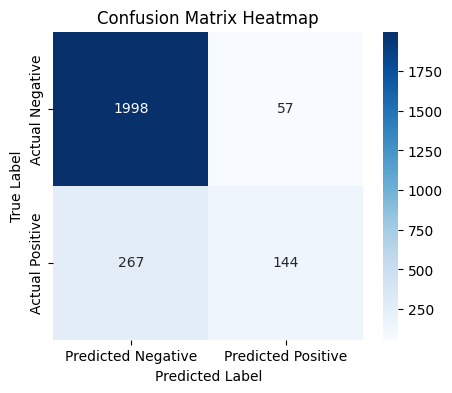

In [ ]:
log_conf_matrix = confusion_matrix(y_test, log_y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(log_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

       False       0.88      0.97      0.93      2055
        True       0.72      0.35      0.47       411

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.70      2466
weighted avg       0.85      0.87      0.85      2466



## SVM

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
print(f"Accuracy (SVM): {accuracy_score(y_test, y_pred_svm)}")

Accuracy (SVM): 0.8349553933495539


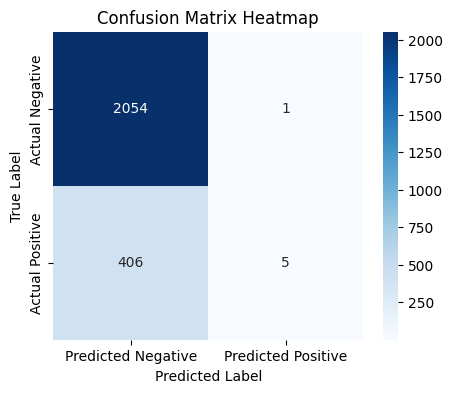

In [ ]:
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5, 4))
sns.heatmap(svm_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

       False       0.83      1.00      0.91      2055
        True       0.83      0.01      0.02       411

    accuracy                           0.83      2466
   macro avg       0.83      0.51      0.47      2466
weighted avg       0.83      0.83      0.76      2466



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
print(f"Accuracy (KNN): {accuracy_score(y_test, y_pred_knn)}")

Accuracy (KNN): 0.8564476885644768


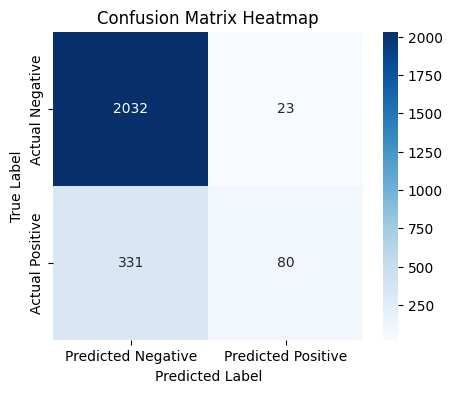

In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print( classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

       False       0.86      0.99      0.92      2055
        True       0.78      0.19      0.31       411

    accuracy                           0.86      2466
   macro avg       0.82      0.59      0.62      2466
weighted avg       0.85      0.86      0.82      2466



## Decision Tree

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
print(f"Accuracy (Decision Tree): {accuracy_score(y_test, y_pred_dt)}")

Accuracy (Decision Tree): 0.8588807785888077


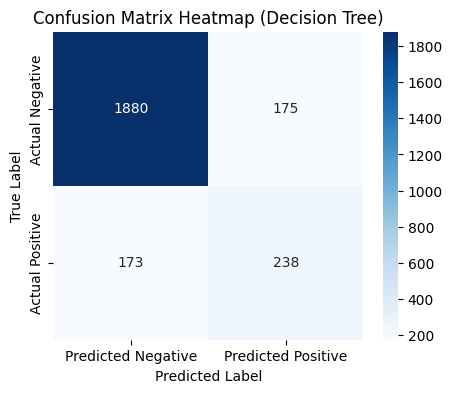

In [ ]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap (Decision Tree)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

       False       0.92      0.91      0.92      2055
        True       0.58      0.58      0.58       411

    accuracy                           0.86      2466
   macro avg       0.75      0.75      0.75      2466
weighted avg       0.86      0.86      0.86      2466



## Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
print(f"Accuracy (Random Forest): {accuracy_score(y_test, y_pred_rf)}")

Accuracy (Random Forest): 0.8884833738848338


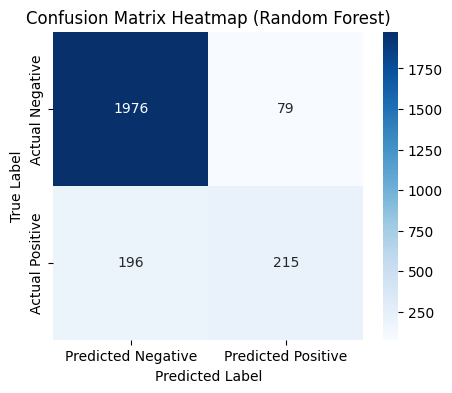

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       False       0.91      0.96      0.93      2055
        True       0.73      0.52      0.61       411

    accuracy                           0.89      2466
   macro avg       0.82      0.74      0.77      2466
weighted avg       0.88      0.89      0.88      2466



## Bootstrapping

In [ ]:
def bootstrap(data, num_samples, statistic):
    n = len(data)
    np.random.seed(42)
    bootstrap_samples = [
        statistic(np.random.choice(data, size=n, replace=True)) for _ in range(num_samples)
    ]
    return np.array(bootstrap_samples)

data = np.random.normal(loc=50, scale=10, size=5000)
num_samples = 10000
statistic = np.mean

bootstrap_results = bootstrap(data, num_samples, statistic)

original_statistic = statistic(data)
mean_statistic = np.mean(bootstrap_results)

accuracy = (1 - abs(original_statistic - mean_statistic) / original_statistic) * 100

lower_bound = np.percentile(bootstrap_results, 2.5)
upper_bound = np.percentile(bootstrap_results, 97.5)

# Results
print(f"Original Mean: {original_statistic:.2f}")
print(f"Bootstrap Mean: {mean_statistic:.2f}")
print(f"Accuracy: {accuracy:.2f}%")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")


Original Mean: 49.98
Bootstrap Mean: 49.98
Accuracy: 100.00%
95% Confidence Interval: (49.70, 50.25)


## **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
common_index = x_train.index.intersection(y_train.index)

x_train = x_train.loc[common_index]
y_train = y_train.loc[common_index]

sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
lr = LogisticRegression()
model = lr.fit(x_train_res, y_train_res)
y_pred_log_res = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_train_res.value_counts()

,count
Revenue,
False,5860
True,5860


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

y_train = y_train.reset_index(drop=True)

common_index = x_train.index.intersection(y_train.index)

x_train = x_train.loc[common_index]
y_train = y_train.loc[common_index]

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

lr = LogisticRegression(max_iter=1000)

model = lr.fit(x_train_res, y_train_res)
y_pred_log_res = model.predict(x_test)

def bootstrap_model(model, x, y):
  n_iterations = 1000
  accuracy_scores = []
  precision_scores = []
  recall_scores = []
  f1_scores = []

  for _ in range(n_iterations):
    x_boot, y_boot = resample(x, y)
    model.fit(x_boot, y_boot)
    y_pred = model.predict(x_boot)
    accuracy = accuracy_score(y_boot, y_pred)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision_score(y_boot, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_boot, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_boot, y_pred, average='weighted'))
  return accuracy_scores, precision_scores, recall_scores, f1_scores

accuracy_scores, precision_scores, recall_scores, f1_scores = bootstrap_model(model, x_train_res, y_train_res)


print(f"Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores)}")
print(f"Average Precision: {sum(precision_scores) / len(precision_scores)}")
print(f"Average Recall: {sum(recall_scores) / len(recall_scores)}")
print(f"Average F1 Score: {sum(f1_scores) / len(f1_scores)}")

Average Accuracy: 0.5414115739160122
Average Precision: 0.5412178563838609
Average Recall: 0.5414115739160122
Average F1 Score: 0.5404223615345812
